<a href="https://colab.research.google.com/github/hildj/DS3001_TeamM_Project/blob/main/neuralnetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import networkx as nx

In [3]:
df = pd.read_csv('/content/hospital data cleaned.csv')
df.head()

,YEAR,HOSPITAL,Procedure/Condition,Risk Adjuested Mortality Rate,Risk Adjuested Mortality Rate.1,Hospital Ratings
0,2023,Adventist Health and Rideout,AMI,7.0,7.0,As Expected
1,2023,Adventist Health and Rideout,Acute Stroke,5.3,5.3,As Expected
2,2023,Adventist Health and Rideout,Carotid Endarterectomy,3.1,3.1,As Expected
3,2023,Adventist Health and Rideout,GI Hemorrhage,2.2,2.2,As Expected
4,2023,Adventist Health and Rideout,Heart Failure,4.0,4.0,As Expected


In [6]:
from sklearn.model_selection import train_test_split

df = df.drop('Risk Adjuested Mortality Rate.1', axis = 1, errors='ignore')
df = df.drop('YEAR', axis = 1, errors='ignore')
df = df.rename(columns={'Risk Adjuested Mortality Rate': 'Risk Adjusted Mortality Rate'})

y = df['Risk Adjusted Mortality Rate'] # Target variable is now numerical

# Identify categorical columns for one-hot encoding, including 'Hospital Ratings'
categorical_cols = ['HOSPITAL', 'Procedure/Condition', 'Hospital Ratings']

# Apply one-hot encoding
X_encoded = pd.get_dummies(df[categorical_cols], columns=categorical_cols, drop_first=True)

# Drop original categorical columns and the target variable from X, then concatenate with encoded columns
X = df.drop(['Risk Adjusted Mortality Rate'] + categorical_cols, axis=1, errors='ignore')
X = pd.concat([X, X_encoded], axis=1)

## Fix: Convert boolean columns to integer (0 or 1) before normalization
for col in X.select_dtypes(include='bool').columns:
    X[col] = X[col].astype(int)

## Maxmin normalize the inputs:
def maxmin(z):
    z_min = z.min() # Use pandas Series methods for min/max
    z_max = z.max()
    if (z_max - z_min) == 0:
        return z # Return the column as is if all values are identical
    return (z - z_min) / (z_max - z_min)

X = X.apply(maxmin)

## Train-test Split:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=100)

In [12]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split

K_max = 100 # Maximum number of nodes

acc = [] # Accuracy on test set
acc_train = [] # Accuracy on training set

for k in np.arange(1,K_max+1,3):#np.arange(1, K_max+1, 3):
    # Fit neural network:
    reg =MLPRegressor(solver = 'adam',
                        hidden_layer_sizes=(k),
                        activation='logistic',
                        max_iter = 2000)
    reg = reg.fit(X_train,y_train)
    acc.append( reg.score(X_test,y_test) )
    acc_train.append( reg.score(X_train,y_train) )

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perce

<Axes: >

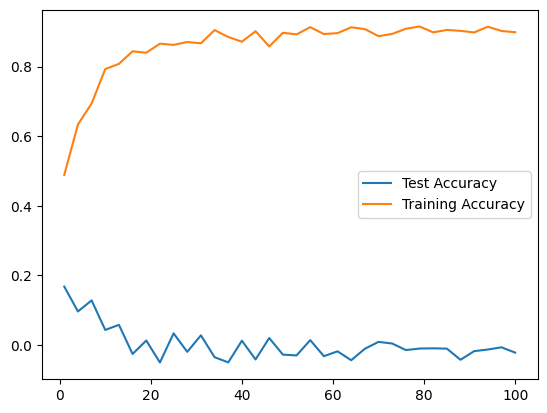

In [13]:
sns.lineplot(x=  np.arange(1,K_max+1,3), y = acc, label='Test Accuracy')
sns.lineplot(x= np.arange(1,K_max+1,3),y=acc_train, label='Training Accuracy')